<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [154]:
import pandas as pd
import psycopg2

In [156]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [56]:
# текст запроса
query_3_1 = f'''
select count(*),
'всего вакансий в базе' info
from vacancies
'''
num_vac=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1154608887.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_vac=pd.read_sql_query(query_3_1,connection)


In [57]:
# результат запроса
display(num_vac)

,count,info
0,49197,всего вакансий в базе


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [60]:
# текст запроса
query_3_1 = f'''
select count(*),
'количество работодателей в базе' info
from employers
'''
num_employers=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\2009555482.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_employers=pd.read_sql_query(query_3_1,connection)


In [61]:
# результат запроса
display(num_employers)

,count,info
0,23501,количество работодателей в базе


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [62]:
# текст запроса
query_3_1 = f'''
select count(*),
'регионов всего в базе данных' info
from areas
'''
num_areas=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\356510197.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_areas=pd.read_sql_query(query_3_1,connection)


In [63]:
# результат запроса
display(num_areas)

,count,info
0,1362,регионов всего в базе данных


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [64]:
# текст запроса
query_3_1 = f'''
select count(*),
'сфер деятельности в базе данных' info
from industries
'''
num_industries=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\3740331063.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_industries=pd.read_sql_query(query_3_1,connection)


In [65]:
# результат запроса
display ( num_industries)

,count,info
0,294,сфер деятельности в базе данных


***

# <center>Выводы по предварительному анализу данных</center>
Выяснено, что:
* количество *вакансий* составляет **49197**
* количество *работодател*ей **23501**
* количество *регионов* **1362**
* количество *сфер деятельности* **294**




# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [67]:
# текст запроса
query_3_1 = f'''
select count(v.id) num_vac,
a.name area
from vacancies v left join areas a on a.id = v.area_id
group by area
order by 1 desc
limit 10
'''
num_vacancies_by_area=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\2654315878.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_vacancies_by_area=pd.read_sql_query(query_3_1,connection)


,num_vac,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
5,1698,Екатеринбург
6,1670,Нижний Новгород
7,1415,Казань
8,1301,Краснодар
9,1144,Самара


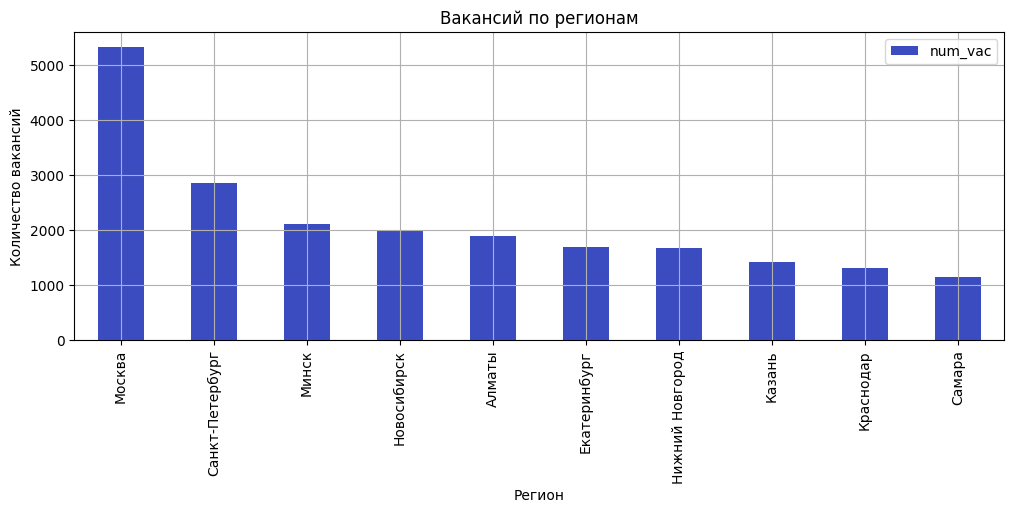

In [72]:
# результат запроса
display(num_vacancies_by_area)
num_vacancies_by_area.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='coolwarm',
    x = 'area',
    ylabel = 'Количество вакансий',
    title='Вакансий по регионам',
    xlabel='Регион'
    
);

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [104]:
# текст запроса
query_3_1 = f'''
select count(v.id) cnt,
'вакансий с указанной зарплатой' info
from vacancies v
where (v.salary_from is not null) or (v.salary_to is not null)
union
select count(v.id) cnt,
'вакансий с неуказанной зарплатой' info
from vacancies v
where (v.salary_from is null) and (v.salary_to is null)
'''
num_filled_salary=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\204616421.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_filled_salary=pd.read_sql_query(query_3_1,connection)


In [105]:
# результат запроса
display(num_filled_salary)

,cnt,info
0,24073,вакансий с указанной зарплатой
1,25124,вакансий с неуказанной зарплатой


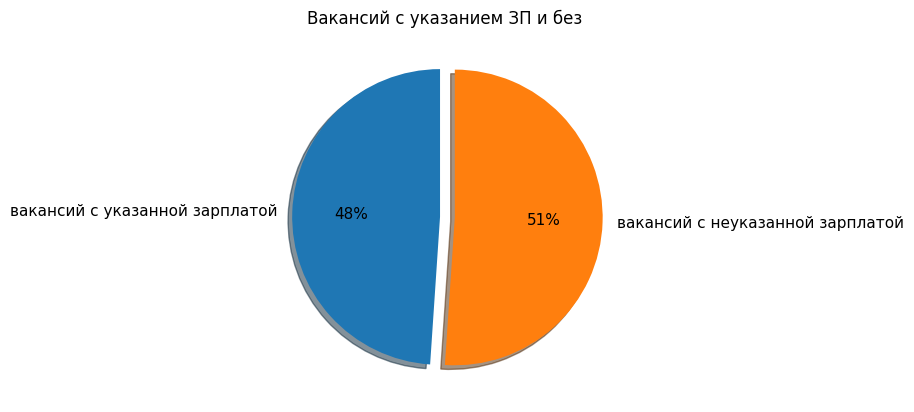

In [106]:
num_filled_salary_tmp=num_filled_salary
num_filled_salary_tmp.set_index('info', inplace=True)
num_filled_salary_tmp.plot(
    kind='pie',
    y='cnt',
    startangle=90,
    autopct='%d%%',
    legend=False,
    textprops={'fontsize': 11},
    title='Вакансий с указанием ЗП и без ',
    ylabel='',
    shadow=True,
    explode=(0.05, 0.05)
);

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [79]:

# текст запроса
query_3_1 = f'''
select round(avg(v.salary_from)) salary_from,
round(avg(v.salary_to)) salary_to,
'зарплатная ''вилка'' от и до' info
from vacancies v
'''
avg_salary=pd.read_sql_query(query_3_1,connection)


C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\2275062802.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary=pd.read_sql_query(query_3_1,connection)


In [80]:
# результат запроса
display(avg_salary)

,salary_from,salary_to,info
0,71065.0,110537.0,зарплатная 'вилка' от и до


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_3_1 = f'''
select count(id) num_vac,
schedule,
employment
from vacancies
group by employment, schedule
order by num_vac desc
'''
num_vac_by_combination=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_29452\2314725412.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_vac_by_combination=pd.read_sql_query(query_3_1,connection)


In [8]:
# результат запроса
display (num_vac_by_combination)

,num_vac,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [122]:
# текст запроса
query_3_1 = f'''
select count(id) num_vac,
experience
from vacancies
group by experience
order by num_vac
'''
num_experience_count=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\2197135170.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_experience_count=pd.read_sql_query(query_3_1,connection)


,num_vac,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


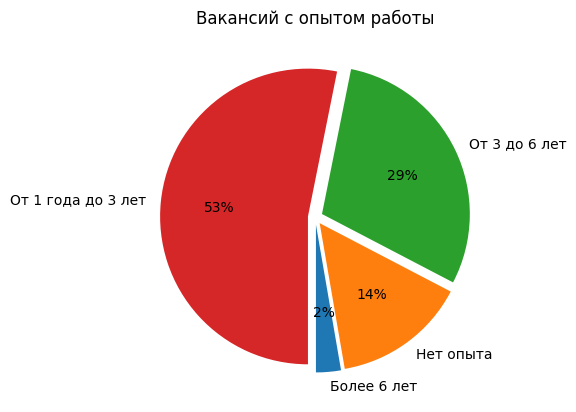

In [123]:
# результат запроса
display (num_experience_count)
num_experience_count.set_index('experience', inplace=True)
num_experience_count.plot(
    kind='pie',
    y='num_vac',
    startangle=270,
    autopct='%d%%',
    legend=False,
    title='Вакансий с опытом работы',
    ylabel='',
    shadow=False,
    explode=(0.05, 0.05, 0.05, 0.05)
);

***

# <center>Выводы по детальному анализу вакансий</center>
* Лидер по количеству вакансий Москва и СПБ
* 24073 вакансии имеют определенность по зарплате
* Зарплатная вилка от **76064** до **110 536** руб
* Больше всего вакансий, где требуется **полная занятость, полный рабочий день**
* Наиболее популярный опыт работы **от 1 года до 3 лет**

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [125]:
# текст запроса
query_3_1 = f'''
select count(v.id) num_vac,
e.name
from vacancies v
left join employers e on e.id=employer_id
group by e.name
order by num_vac desc
limit 6
'''
empl_by_num_vac=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\3656901507.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_by_num_vac=pd.read_sql_query(query_3_1,connection)


In [126]:
# результат запроса
display(empl_by_num_vac)

,num_vac,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть
5,327,ИК СИБИНТЕК


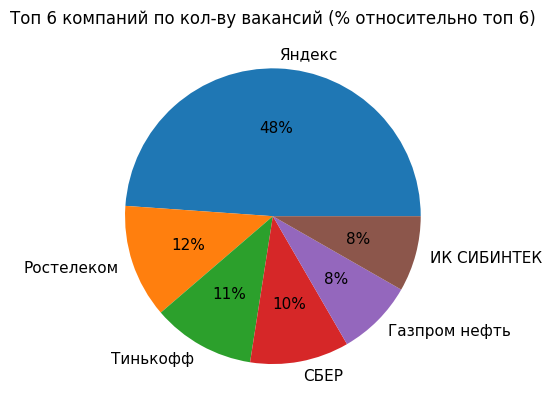

In [127]:
empl_by_num_vac_tmp = empl_by_num_vac
empl_by_num_vac_tmp.set_index('name', inplace=True)
empl_by_num_vac_tmp.plot(
    kind='pie',
    y='num_vac',
    autopct='%d%%',
    legend=False,
    textprops={'fontsize': 11},
    title='Топ 6 компаний по кол-ву вакансий (% относительно топ 6)',
    ylabel=''
);

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [147]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
with selected_cols as
(select 
count(e.name) num_empl,
a.name area,
count(v.id) vac
from employers e
left join vacancies v on e.id=v.employer_id
left join areas a on a.id=e.area
group by a.name
)
select
area,
sum(num_empl)
from selected_cols
group by area
having sum(vac)=0
order by 2 desc
'''
empl_vac_by_area=pd.read_sql_query(query_3_1,connection)


C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\202650321.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_vac_by_area=pd.read_sql_query(query_3_1,connection)


In [148]:
# результат запроса
display(empl_vac_by_area)

,area,sum
0,Серпухов,6.0
1,Канада,5.0
2,Чехов,5.0
3,Испания,3.0
4,Бобруйск,3.0
...,...,...
118,Яблоновский (Республика Адыгея),1.0
119,Морозовск\n,1.0
120,Киев,1.0
121,Сортавала,1.0


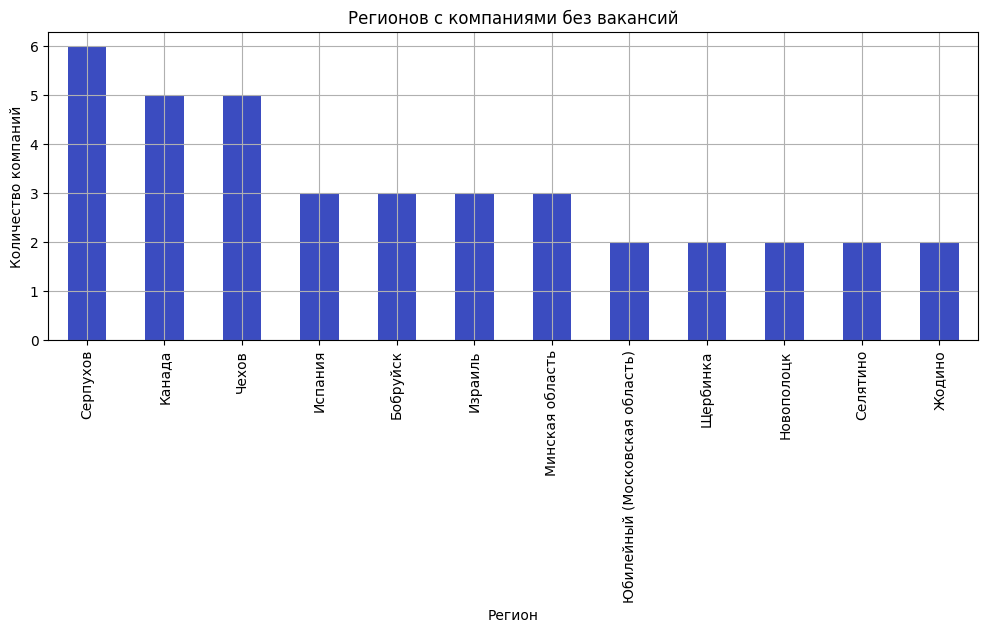

In [150]:
empl_vac_by_area[:12].plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='coolwarm',
    x = 'area',
    legend=False,
    xlabel = 'Регион',
    ylabel = 'Количество компаний',
    title = 'Регионов с компаниями без вакансий'
    
);

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [129]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
with areas_table as
(select 
e.name empl,
v.area_id areas
from vacancies v
left join employers e on v.employer_id = e.id
)
select 
empl,
count(distinct areas)
from areas_table
group by empl
order by count desc
'''
empl_vac_by_area=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1943586708.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_vac_by_area=pd.read_sql_query(query_3_1,connection)


In [130]:
# результат запроса
display(empl_vac_by_area)

,empl,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


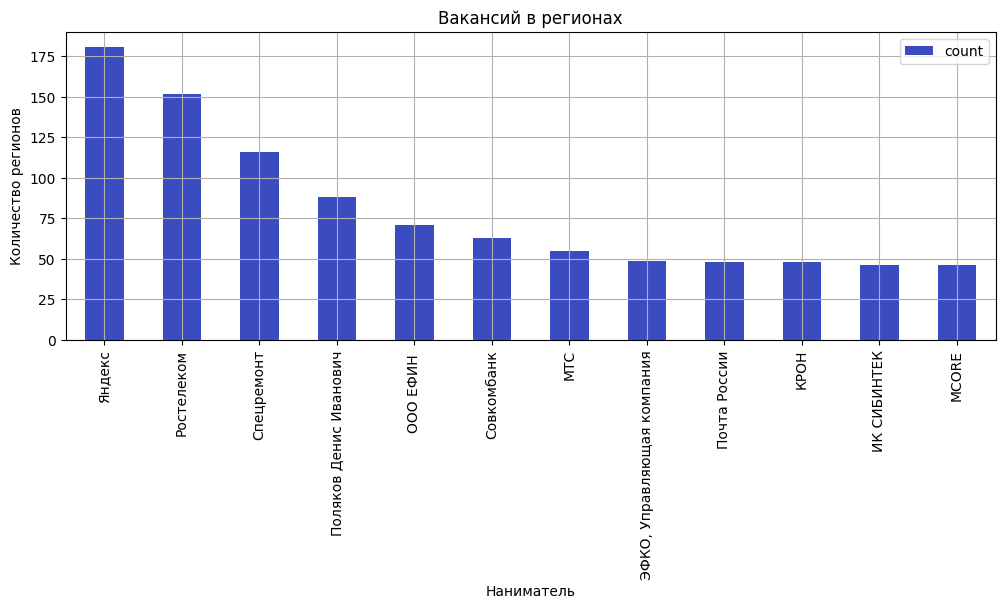

In [131]:
empl_vac_by_area[:12].plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='coolwarm',
    x = 'empl',
    xlabel = 'Наниматель',
    ylabel = 'Количество регионов',
    title = 'Вакансий в регионах'
    
);

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [88]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
select 
count(e.name),
'Не указана сфера деятельности' info
from employers_industries ei
full join employers e on e.id=ei.employer_id
where ei.industry_id is null
UNION all
select 
count(e.name),
'Сфера деятельности указана' info 
from employers_industries ei
full join employers e on e.id=ei.employer_id
where ei.industry_id is not null

'''
count_empl_no_industries=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\710834212.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_empl_no_industries=pd.read_sql_query(query_3_1,connection)


In [89]:
# результат запроса
display(count_empl_no_industries)

,count,info
0,8419,Не указана сфера деятельности
1,32333,Сфера деятельности указана


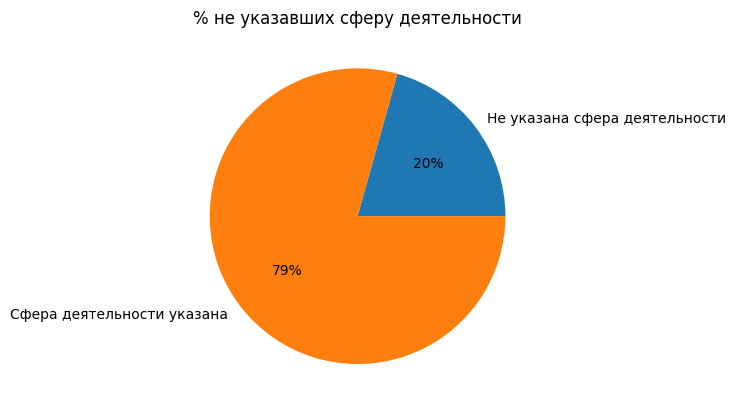

In [90]:
count_empl_no_industries_tmp = count_empl_no_industries
count_empl_no_industries_tmp.set_index('info', inplace=True)
count_empl_no_industries_tmp.plot(
    kind='pie',
    y='count',
    autopct='%d%%',
    legend=False,
    title='% не указавших сферу деятельности',
    ylabel=''
);

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [288]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
select
count(ei.industry_id),
e.name
from employers_industries ei
full join employers e on e.id=ei.employer_id
group by e.name
having count(ei.industry_id) = 4
order by 2
offset 2 
limit 1
'''
empl_by_industries=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_9452\3407559998.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_by_industries=pd.read_sql_query(query_3_1,connection)


In [289]:
# результат запроса
display(empl_by_industries)

,count,name
0,4,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [23]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
select
i.name ind,
count(e.name) empl
from employers_industries ei
full join employers e on e.id=ei.employer_id
left join industries i on i.id=ei.industry_id
where i.name='Разработка программного обеспечения'
group by i.name
order by 2
'''
empl_by_industries_programming=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_20208\4153436148.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_by_industries_programming=pd.read_sql_query(query_3_1,connection)


In [24]:
# результат запроса
display(empl_by_industries_programming)

,ind,empl
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [132]:
# код для получения списка городов-милионников

import pandas as pd
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
table = page.find("table", class_='standard')

# Извлекаем данные
data = []
for row in table.find_all('tr'):
    row_data = []
    for cell in row.find_all(['td', 'th']):
        text = cell.get_text(strip=True)
        row_data.append(text)
    data.append(row_data)

# Создаем DataFrame
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]

# Очищаем индексы
towns_df = df.reset_index(drop=True)

In [133]:
town_list=[]
for element in towns_df['Город']:
    town_list.append(element)
print (town_list)
towns_crit_list = []
for element in town_list:
    towns_crit_list.append("a.name='"+element+"'")
print (towns_crit_list)
town_request = ' or '.join(towns_crit_list)
print (town_request)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']
["a.name='Москва'", "a.name='Санкт-Петербург'", "a.name='Новосибирск'", "a.name='Екатеринбург'", "a.name='Казань'", "a.name='Красноярск'", "a.name='Нижний Новгород'", "a.name='Челябинск'", "a.name='Уфа'", "a.name='Краснодар'", "a.name='Самара'", "a.name='Ростов-на-Дону'", "a.name='Омск'", "a.name='Воронеж'", "a.name='Пермь'", "a.name='Волгоград'"]
a.name='Москва' or a.name='Санкт-Петербург' or a.name='Новосибирск' or a.name='Екатеринбург' or a.name='Казань' or a.name='Красноярск' or a.name='Нижний Новгород' or a.name='Челябинск' or a.name='Уфа' or a.name='Краснодар' or a.name='Самара' or a.name='Ростов-на-Дону' or a.name='Омск' or a.name='Воронеж' or a.name='Пермь' or a.name='Волгоград'


In [134]:
# текст запроса
query_3_1 = f'''
select
a.name area,
count(v.name) vacan
from vacancies v
left join employers e on e.id=v.employer_id
left join areas a on a.id=v.area_id
where e.name='Яндекс' and ({town_request})
group by e.name, a.name
order by 2 desc
'''
yandex_vacancies_by_area=pd.read_sql_query(query_3_1,connection)
# Добавляем итоговую строку
total_row = pd.DataFrame({
    'area': ['Итого'],
    'vacan': [yandex_vacancies_by_area['vacan'].sum()]
})
yandex_vacancies_by_area = pd.concat([yandex_vacancies_by_area, total_row], ignore_index=True)


C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\947231047.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_vacancies_by_area=pd.read_sql_query(query_3_1,connection)


In [135]:
# результат запроса
display(yandex_vacancies_by_area)

,area,vacan
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


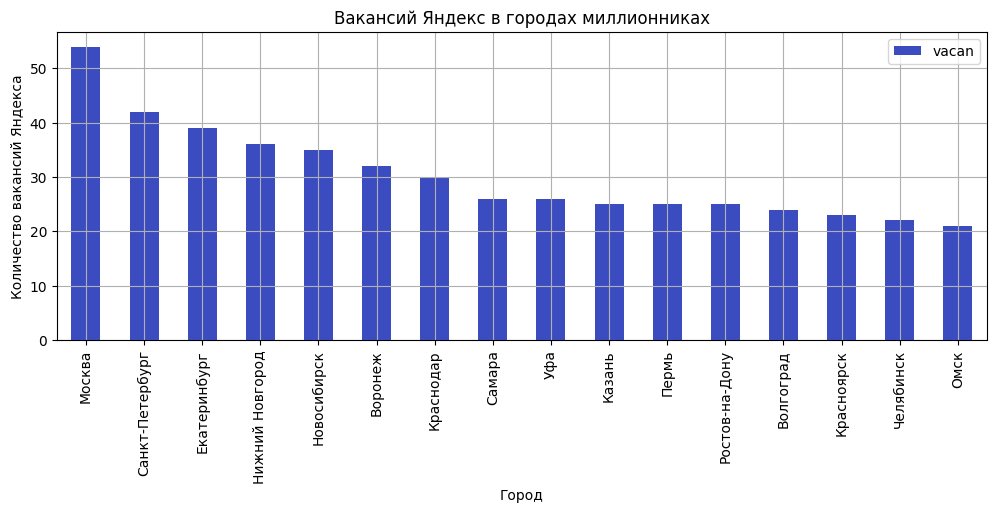

In [136]:
yandex_vacancies_by_area[:16].plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='coolwarm',
    x = 'area',
    xlabel = 'Город',
    ylabel = 'Количество вакансий Яндекса',
    title = 'Вакансий Яндекс в городах миллионниках'
    
);

***

# <center>Выводы по анализу работодателей</center>
1. *топ 6 по количеству вакансий* **Яндекс 48%, Ростелеком 12%, Тинькофф 11%, СБЕР 10%, Газпром нефть 8% , ИК Сибинтек 8%**. Лидер с 4х кратным отрывом по количеству вакансий Яндекс. *(%% получены от пула топ 6)*
2. Имеются регионы, где расположены работадатели, *но вакансий там нет* - например такие как **Серпухов, Канада, Чехов и тд**
3. Компании, у которых вакансии представлены *в наибольшем количестве регионов*: **Яндекс, Ростелеком, Спецремонт и тд**
4. Компании *не раскрывающие сферу деятельности* составляют **20% от общего числа компаний** в базе данных
5. **2ГИС** *на третьем месте* в алфавитном списке компаний, у которых 4 сферы деятельности
6. *Разработка програмного обеспечения* указана у **3553 компаний**
7. *Наибольшее количество вакансий* компании Яндекс: **в Москве 54, Спб 42, Екб 39, Нижний Н 36, Новосиб 35**



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [157]:
# текст запроса
query_3_1 = f'''
select
count(*),
'вакансий имеет отношение к данным' info
from vacancies
where (lower(name) like '%data%') or (lower(name) like '%данн%')
'''
data_vac_count=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1278531886.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vac_count=pd.read_sql_query(query_3_1,connection)


In [ ]:
# результат запроса
display(data_vac_count)

,count,info
0,1771,вакансий имеет отношение к данным


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса
query_3_1 = f'''
with datasc_table as
(select
*
from vacancies
where (lower(name) like '%data scientist%') or (lower(name) like '%data science%') or (lower(name) like '%исследователь данных%') or ((lower(name) like '%ml%') and (lower(name) not like '%html%')) or (lower(name) like '%machine learning%') or (lower(name) like '%машинн%обучен%')
)
select count(*),
'вакансий подходят для начинающего DS' info
from datasc_table
where (lower(name) like '%junior%') or (lower(experience) like '%нет опыта%') or (lower(employment) like '%стажировка%')
'''
datasc_vac_count=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\2138804377.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datasc_vac_count=pd.read_sql_query(query_3_1,connection)


In [ ]:
# результат запроса
display(datasc_vac_count)

,count,info
0,51,вакансий подходят для начинающего DS


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_3_1 = f'''
with datasc_table as
(select
*
from vacancies
where (lower(name) like '%data scientist%') or (lower(name) like '%data science%') or (lower(name) like '%исследователь данных%') or ((lower(name) like '%ml%') and (lower(name) not like '%html%')) or (lower(name) like '%machine learning%') or (lower(name) like '%машинн%обучен%')
)
select count(*),
'вакансий для DS, c SQL или postgres' info
from datasc_table
where (lower(key_skills) like '%sql%') or (lower(key_skills) like '%postgres%')
'''
sql_postgres_vac_count=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1857062771.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_postgres_vac_count=pd.read_sql_query(query_3_1,connection)


In [ ]:
# результат запроса
display(sql_postgres_vac_count)

,count,info
0,229,"вакансий для DS, c SQL или postgres"


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
with datasc_table as
(select
*
from vacancies
where (lower(name) like '%data scientist%') or (lower(name) like '%data science%') or (lower(name) like '%исследователь данных%') or ((lower(name) like '%ml%') and (lower(name) not like '%html%')) or (lower(name) like '%machine learning%') or (lower(name) like '%машинн%обучен%')
)
select count(*),
'вакансий для DS, с Python' info
from datasc_table
where (lower(key_skills) like '%python%')
'''
python_vac_count=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1129190998.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  python_vac_count=pd.read_sql_query(query_3_1,connection)


In [ ]:
# результат запроса
display(python_vac_count)

,count,info
0,357,"вакансий для DS, с Python"


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
with datasc_table as
(select
LENGTH(key_skills) - LENGTH(REPLACE(key_skills, chr(9), '')) + 1 num_skills,
key_skills ks
from vacancies
where ((lower(name) like '%data scientist%') or (lower(name) like '%data science%') or (lower(name) like '%исследователь данных%') or ((lower(name) like '%ml%') and (lower(name) not like '%html%')) or (lower(name) like '%machine learning%') or (lower(name) like '%машинн%обучен%'))  and (key_skills is not NULL)
)
select  
round(avg(num_skills),2),
'ключевых навыков в среднем' info
from datasc_table
'''
key_skills_ds=pd.read_sql_query(query_3_1,connection)

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\4129981388.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  key_skills_ds=pd.read_sql_query(query_3_1,connection)


In [ ]:
display(key_skills_ds)

,round,info
0,6.55,ключевых навыков в среднем


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# текст запроса
query_3_1 = f'''
with datasc_table as
(select
salary_from fr,
salary_to t,
experience
from vacancies
where ((lower(name) like '%data scientist%') or (lower(name) like '%data science%') or (lower(name) like '%исследователь данных%') or ((lower(name) like '%ml%') and (lower(name) not like '%html%')) or (lower(name) like '%machine learning%') or (lower(name) like '%машинн%обучен%')) and ((salary_from is not NULL) or (salary_to is not NULL))
)
select round(avg(coalesce((fr+t)/2,coalesce(fr,t)))) avg_salary,
experience
from datasc_table
group by experience
'''
avg_salary_ds=pd.read_sql_query(query_3_1,connection)
#where lower(experience) like 'от 3 до 6 лет'

C:\Users\deeba\AppData\Local\Temp\ipykernel_6196\1408809663.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_ds=pd.read_sql_query(query_3_1,connection)


In [ ]:
# результат запроса
display (avg_salary_ds)

,avg_salary,experience
0,256454.0,От 3 до 6 лет
1,144233.0,От 1 года до 3 лет
2,157933.0,Более 6 лет
3,74643.0,Нет опыта


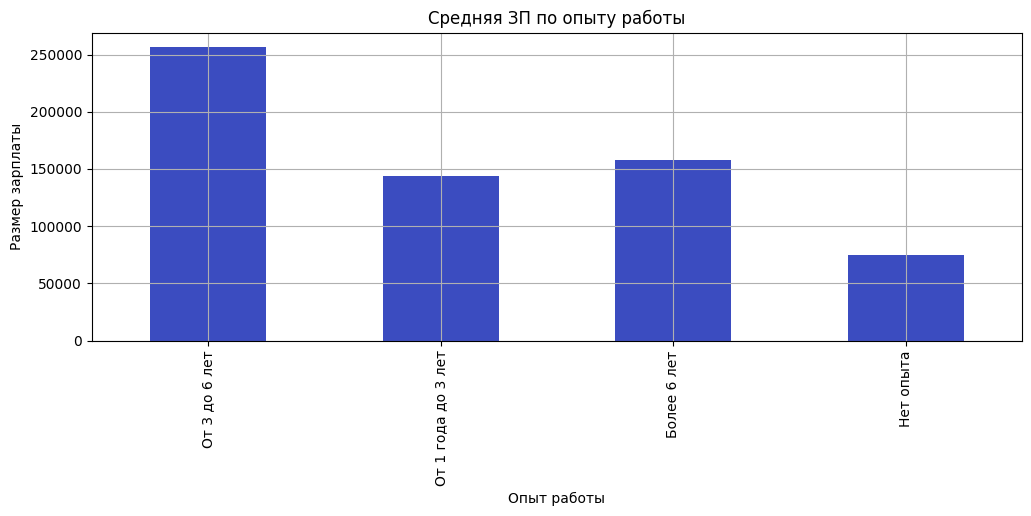

In [ ]:
avg_salary_ds.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=False,
    colormap='coolwarm',
    x = 'experience',
    xlabel = 'Опыт работы',
    ylabel = 'Размер зарплаты',
    title = 'Средняя ЗП по опыту работы'
    
);

***

# <center>Выводы по предметному анализу </center>

1. Вакансий, имеющих отношение к данным **1771шт**
2. Вакансий для *начинающего DS* **51шт**
3. Вакансий с *SQL или postgress* **229шт**
4. Вакансий *с Python* **357шт**
5. В среднем указывается **6.55** *ключевых навыков для профессии DS*
6. *Средняя зарплата* с опытом работы от 3 до 6 лет **256454руб**

# Общий вывод по проекту

***
### *подведем итог исследования, обобщите выводы*
#### *здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования*

# <center> Выводы: </center>

1. Зарплата DS специалистов выше средней зарплатной вилки
2. Количество вакансий DS специалистов очень маленькое по сравнению с общим числом ваканский
3. Основные предложения по вакансиям DS специалистов (как и других специальностей) преимущественно расположенны в городах миллионниках
4. Компания лидер по количеству вакансий для DS специалистов - компания Яндекс
5. DS специалистов нанимают в основном крупнейшие компании.
6. Можно провести анализ сфер деятельности компаний, которые нанимают DS специалистов. Предположительно это банковский сектор и технологические гиганты типа Яндекс.
7. Так же, можно было бы сделать прогноз на изменение количества вакансий DS и размера ЗП. Предподожительно, количество компаний нанимающих специалистов DS будет увеличиваться и следом увеличится количество вакансий. Можно предположить, что размер оплаты труда DS специалистов сильно не поменяется.